In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('mnist_train.csv')
df = df.sample(10000, random_state=42)
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
12628,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39991,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8279,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [5]:
y = df['label']
X = df.drop('label', axis=1)

In [6]:
X.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.00000,10000.000000,10000.000000,10000.00000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.11110,0.082100,0.072800,0.01560,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.58858,4.371278,3.528278,1.31024,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.00000,254.000000,199.000000,128.00000,0.0,0.0,0.0,0.0,0.0,0.0


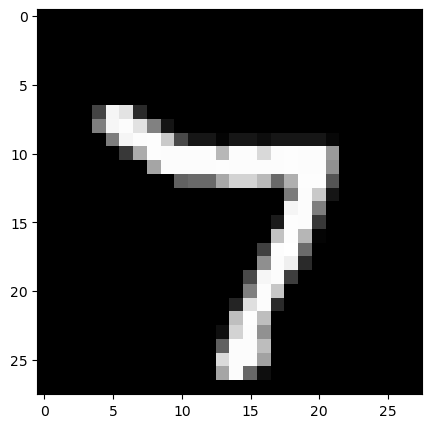

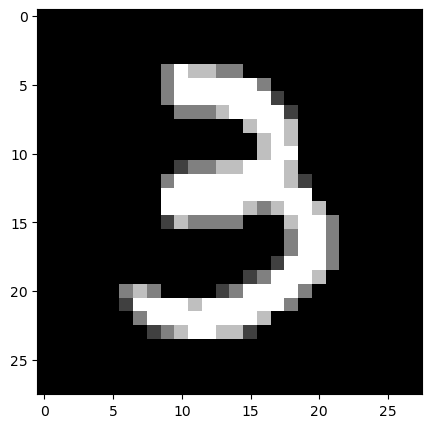

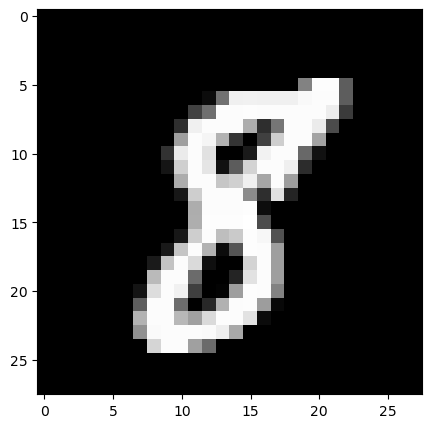

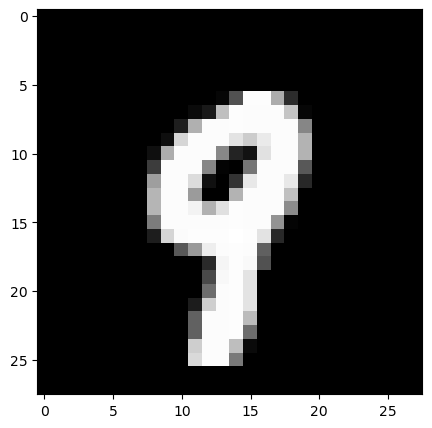

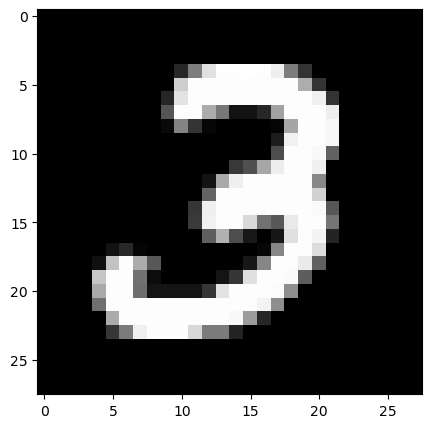

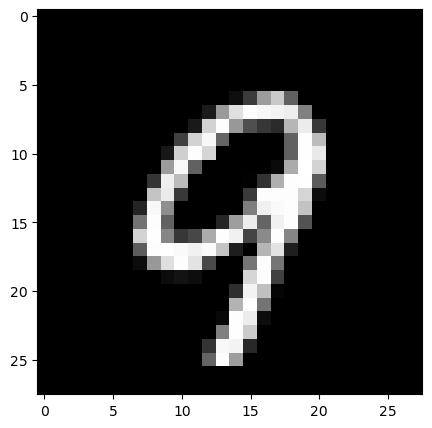

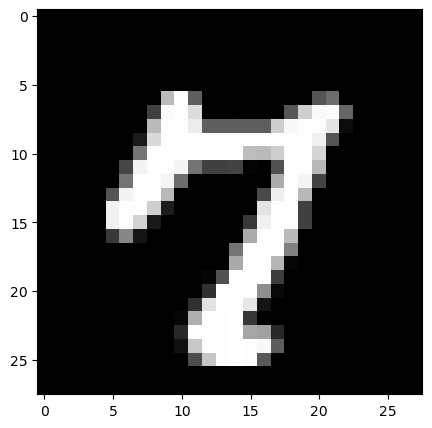

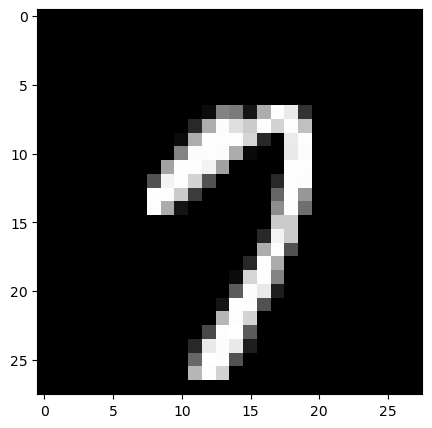

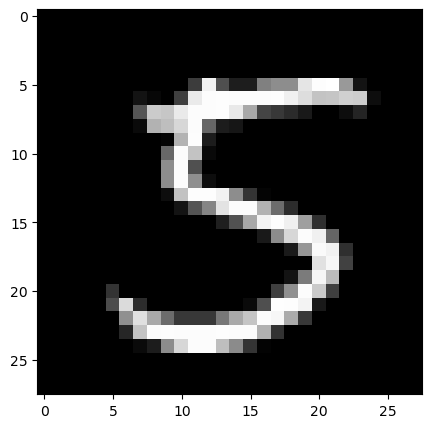

In [8]:
for i in range(0,9):
    plt.figure(figsize=(5,5))
    data = X.iloc[i].values.reshape(28,28)
    plt.imshow(data, cmap='gray')
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rfc = RandomForestClassifier()

rfc.fit(X_trains, y_train)
y_train_pred = rfc.predict(X_trains)
y_test_pred = rfc.predict(X_tests)

print('accuracy score - train', accuracy_score(y_train, y_train_pred))
print('class report - train', classification_report(y_train, y_train_pred))
print('confusion report - train', confusion_matrix(y_train, y_train_pred))

print('accuracy score - test', accuracy_score(y_test, y_test_pred))
print('class report - test', classification_report(y_test, y_test_pred))
print('confusion report - test', confusion_matrix(y_test, y_test_pred))

accuracy score - train 1.0
class report - train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       702
           2       1.00      1.00      1.00       663
           3       1.00      1.00      1.00       668
           4       1.00      1.00      1.00       654
           5       1.00      1.00      1.00       626
           6       1.00      1.00      1.00       669
           7       1.00      1.00      1.00       719
           8       1.00      1.00      1.00       658
           9       1.00      1.00      1.00       693

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700

confusion report - train [[648   0   0   0   0   0   0   0   0   0]
 [  0 702   0   0   0   0   0   0   0   0]
 [  0   0 663   0   0   0   0   0   0   0]
 [  0   0   0 668   0   0   0   0   0  

### Tuning Random Forest

In [6]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [12]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()

param_dist = {'n_estimators':sp_randint(50, 1000),
              'max_depth':sp_randint(2, 20),
              'max_features':sp_randint(2, 754),
              'min_samples_leaf':sp_randint(1, 25)}

rsearch = RandomizedSearchCV(rfc, param_distributions=param_dist, cv=3, scoring='accuracy',
                            n_iter=5, random_state=42)
#rsearch.fit(X_trains, y_train)

### Principal Componenent Analysis

In [3]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
pca.fit(X_trains)

PCA()

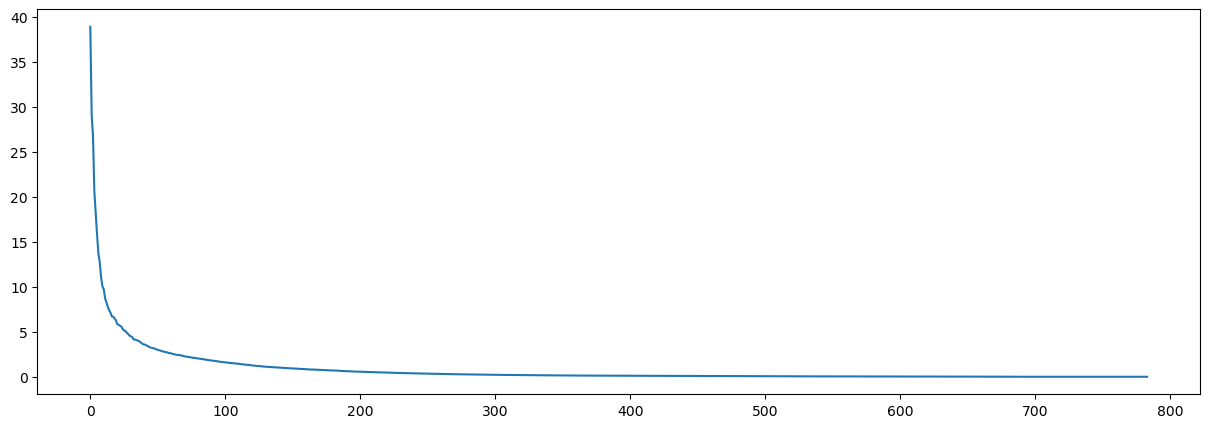

In [15]:
## Eigenvalues

plt.figure(figsize=(15, 5))
plt.plot(pca.explained_variance_)
plt.show()

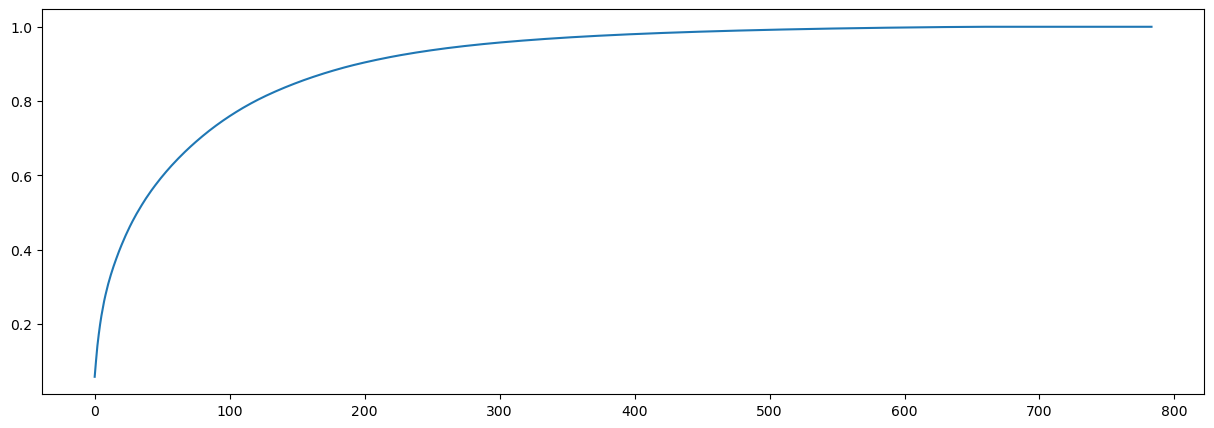

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [17]:
pca = PCA(0.95)
pca.fit(X_trains)

X_train_pc = pca.fit_transform(X_trains)
X_test_pc = pca.transform(X_tests)

In [18]:
X_train_pc.shape

(6700, 280)

In [19]:
rfc = RandomForestClassifier()

rfc.fit(X_train_pc, y_train)
y_train_pred = rfc.predict(X_train_pc)
y_test_pred = rfc.predict(X_test_pc)

print('accuracy score - train', accuracy_score(y_train, y_train_pred))
print('class report - train', classification_report(y_train, y_train_pred))
print('confusion report - train', confusion_matrix(y_train, y_train_pred))

print('accuracy score - test', accuracy_score(y_test, y_test_pred))
print('class report - test', classification_report(y_test, y_test_pred))
print('confusion report - test', confusion_matrix(y_test, y_test_pred))

accuracy score - train 1.0
class report - train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       702
           2       1.00      1.00      1.00       663
           3       1.00      1.00      1.00       668
           4       1.00      1.00      1.00       654
           5       1.00      1.00      1.00       626
           6       1.00      1.00      1.00       669
           7       1.00      1.00      1.00       719
           8       1.00      1.00      1.00       658
           9       1.00      1.00      1.00       693

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700

confusion report - train [[648   0   0   0   0   0   0   0   0   0]
 [  0 702   0   0   0   0   0   0   0   0]
 [  0   0 663   0   0   0   0   0   0   0]
 [  0   0   0 668   0   0   0   0   0  

### Linear Descriminant Analysis (LDA)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

X_train_lda = lda.fit_transform(X_trains, y_train)
X_test_lda = lda.transform(X_tests)

In [21]:
X_train_lda.shape, X_test_lda.shape

((6700, 9), (3300, 9))

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rfc = RandomForestClassifier()

rfc.fit(X_train_lda, y_train)

y_train_pred = rfc.predict(X_train_lda)
y_test_pred = rfc.predict(X_test_lda)

print('accuracy score - train', accuracy_score(y_train, y_train_pred))
print('class report - train', '\n', classification_report(y_train, y_train_pred))
print('confusion report - train', confusion_matrix(y_train, y_train_pred))
print('\n')
print('accuracy score - test', accuracy_score(y_test, y_test_pred))
print('class report - test', '\n', classification_report(y_test, y_test_pred))
print('confusion report - test', confusion_matrix(y_test, y_test_pred))

accuracy score - train 1.0
class report - train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       702
           2       1.00      1.00      1.00       663
           3       1.00      1.00      1.00       668
           4       1.00      1.00      1.00       654
           5       1.00      1.00      1.00       626
           6       1.00      1.00      1.00       669
           7       1.00      1.00      1.00       719
           8       1.00      1.00      1.00       658
           9       1.00      1.00      1.00       693

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700

confusion report - train [[648   0   0   0   0   0   0   0   0   0]
 [  0 702   0   0   0   0   0   0   0   0]
 [  0   0 663   0   0   0   0   0   0   0]
 [  0   0   0 668   0   0   0   0   0